# DSM020 coursework 1:
## Coursework project proposal
## The power of electronic word of mouth: can game developers use the language of critic's reviews to conclusively evaluate the quality of their gaming products?
### James Maddix
### Student number: 210163148/1

## Introduction

With the ongoing technological innovations, the video game industry is growing exponentially. This growth has gained attention from a plethora of directors in Hollywood, who have taken it upon themselves to adapt many of these games to the big screen. However, these have been poorly received, when their scores on Rotten Tomatoes are taken into consideration$^{1}$. These attempts of adaptations is evidence that the movie industry is attempting to capture some of the profits that the lucrative video game market is collating. A recent study by the Entertainment Software Association reported that the United States video game industry generated 90.3 billion dollars in annual economic output in 2019 and supporting hundreds of thousands of jobs in the process $^{2}$. This doesn't just include the software aspect of the video game industry, as the video game industry is much larger than just the software components. This also includes the accessories, such as headphones and game controllers; the manufacturers that provide the hardware that goes into the consoles and the developers that are employed across the US.   

This economic boom has raised the profile of video games in the media, with many mainstream newspapers reviewing new video game releases regularly for audiences. However, with the review aggregators such as Rotten Tomatoes having a large movie review database, there is a deficiency in websites that collate critics reviews from across the internet for video games$^{3}$. This leads onto the scope of interest for this project: to explore the a video game review aggregator for a sample of video game reviews and to reach conclusions on a project proposal based on a literature review, data preprocessing and exploratory data analysis.

## Literature review

The current literature in the academic ether is orientated towards the study of movie or book reviews. However, there is enough information to establish a direction of what to investigate in order to produce a valid research question and hypothesis.

The attention of some scholars have been drawn to the online reviews of a product (referred to as "electronic word of mouth") and the relationship with the subsequent sales of that product. A cross-sectional regression analysis was performed on the sales of books at two websites (Amazon.com and bn.com) and established that as the average star value of a book increases, the sales of that book improves (the effect was statistically insignificant for bn.com, however)$^{5}$. The logic behind this correlation is that the online review valence influences the customer's evaluation of the product and consequently their decision whether or not to purchase the product. Although this study had somewhat concluded there to be a relationship in online review valence and product sales, other studies have found the relationship to be  inconsequential. Another study, exploring the relationship between word of mouth online and the box office revenues in the movie industry, found that there was more of an indirect relationship between the word of mouth valence and the revenue generated, in that a higher valence generates an increase in the word of mouth volume, which increases box office revenue$^{6}$. The contraditory nature of these studies highlights the complexity of online review systems and the interdependency with an industry's revenue.

An interesting analysis that may be possible to explore in the project is the nature of user(gamers) reviews in comparison with critics reviews. A study exploring discrepencies between these two variables found that the user reviews displayed a bimodal distribution, as there was a tendency for gamers to give polarizing scores of 0 or 10, whereas critics ratings are more balanced. These differences are thought to be down to the sentimentality that gamers exhibit towards games and hence a more emotionally charged review, whereas critics review from a more balanced and professional standpoint$^{7}$. 

With the evolution of video game reviews online, the need to analyse the opinions of gamers and critics for companies to get a competitive edge is becoming an ideal solution in an extremely competitive market. The majority of work in sentiment analysis is focussed towards Twitter and other social media platforms, due to their freely available data and APIs as well as the volume of data that these platforms make available. Therefore, the volume of literature pertaining to the analysis of sentiment in video game reviews is small. 

Sentiment analysis, also known as opinion mining, is an extension of natural language processing (NLP) that extracts contextual information from the data to gain an understanding into the underlying opinions expressed. This suitably appeals to companies or organisations where profits are dependant on the consumer’s experience. Extraction of certain words such as adjectives, and determining the polarity of each word, gives a viable indication into the way words with positive and negative polarities are associated with certain sentiments$^{8}$. The article also addresses the challenges of the human language. Words that are negative by definition, can be used in a positive way when reviewing games (the examples of "addictive" and "wicked" are used). Another observation in a different paper was discovered in that a set of words can indicate a polarity of sentiment in a given context$^{9}$. In this paper, the authors analysed reviews and ratings scores to find that some words were positively or negatively correlated with certain sentiments in the reviews, calculated using a word-score correlation metric. 

Comparisons between different machine learning algorithms have been made in the literature, when analysing sentiment. One study analysed the accuracy of Guassian Naive Bayes classifier and Decision Trees, to find the Decision Trees provided better accuracy overall, even when the n-grams are modified.$^{10}$ It was interesting to note in this paper, the use of a Receiver Operating Characteristic curve (ROC) as a suitable way to visually represent the sensitivity and specificity of a model as the the threshold or number of features change. 

### Importing libraries from python

To prevent the unneccessary scrolling through the code to find where libraries have been imported, I have provided one cell below with all of the imported libraries. I find this is a more tidy and efficient way to manage my libraries. 

In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from time import *
from random import randint
from tqdm.notebook import tqdm
import numpy as np
from dateutil.parser import parse
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

## Metacritic.com


Metacritic is a review aggregator, a website that was launched in 2001 as a way to consolidate product reviews in a single location, and compiling the critics scores into a single metascore, which is the weighted average, considering publications that are higher in stature with more significance towards the weighted average$^{4}$.

The website provides aggregated reviews for films, TV series, music albums and video games. Each product on the website has its own pages on the website, providing customers with metadata e.g. product genre, company producer/developer, rating etc. along with the metascore and user score. As previously stated, the metascore is the weight average based on the critics scores. The user score is established by taking the average of the user score distribution.

### Exploring metacritic and finding a sample of games to scrape

Although the website is easy to navigate, metacritic is complex in the options available for scraping. As soon as I started to explore the website, I was instantly made aware of the compartmentalisation of the games based on console, genre, rating, etc.

This has meant that I needed to make a decision on where I wanted to scrape the data. As a video gaming fan, and an even bigger fan of roleplaying games, I decided to locate a sample of the roleplaying games using beautiful soup. I decided on the first ten pages which is all the roleplaying games from the last five years. The URL has been modified above to not include the page number so that the range of page numbers can be looped through. For pages 1-10 on the website, the link suffix will need to have numbers 0-9.

### Ethics of data use for metacritic.com

When I attempted to scrape large quantities of data on the website, my code would produce a connection reset error, where the host would abort the connection after a period of time. This meant that I was unable to scrape the relevant information using the code provided below. After my unsuccessful attempts to troubleshoot the error using help from the internet, I looked for any information on data mining/scraping in the "terms of use" section on metacritic.com. Under the section titled "Access to Services and Accounts; Acceptable Use", it states that: 

"Without limiting any other provision in this Agreement, you agree not to do the following, or assist others to do the following:

- Engage in unauthorized spidering, “scraping,” data mining or harvesting of Content, or use any other unauthorized automated means to gather data from or about the Services"$^{11}$

I decided to use an alternative website that harbours video game reviews but also provides numerous APIs for developers. OpenCritic (opencritic.com) is also a video game review aggregator.

Although I can no longer scrape data from metacritic.com, I have left the code on the next section (*Code intended to be used to scrape metacritic.com*), displaying the function that I had intended use to scrape the relevant data.

## Code intended to be used to scrape metacritic.com

In [ ]:
URL = "https://www.metacritic.com/browse/games/genre/date/role-playing/all?view=condensed&page="
headers = {"user-agent":"Chrome/91.0.4472.114"}
#a function has been defined to obtain a list of parsed website structures from the multiple pages on metacritic and get the page links for each game
def get_links(URL, headers, no_of_pages=9):
    full_game_links = []
    page = 0
    while page <= no_of_pages:
        r = requests.get(URL + str(page), headers = headers)
        #after each request, get a message detailing the status of the response
        try:
            r.raise_for_status()
        except Exception as exc:
            print("There was an issue with the request: %s " % (exc))
    
        soup = BeautifulSoup(r.text)
        games = soup.find_all("a", class_="title", href=True)
        links = [game["href"] for game in games]
        for link in links:
            full_game_links.append(link)
        page += 1
        sleep(3)
    return full_game_links

#links = get_links(URL, headers)
#links

When I scraped the game_links above, I managed to obtain the relevant results, but sequential attempts would randomly either scrape successfully or raise a connection reset error.

From each video game webpage on metacritic, I created a function to scrape the following data:
- Name of the game 
- The metascore
- The summary 
- Release date
- Developer 
- Genre 
- Critics reviews 
- Critics score

The following cell provides the code for this now obselete function.

In [ ]:
#create a function that scrapes the relevant information from each link
def scraper(link_list, headers, jar=None):
    """Function defines a webscraper for metacritic game reviews. The purpose is to scrape specific pieces of information
       from multiple video game pages and append that data to a list."""
    def critics_reviews(link, headers):
        #access html for critics reviews page
        r= requests.get(link, headers = headers)

        soup = BeautifulSoup(r.text, 'html.parser')

        review_text = soup.find_all('div', class_ = "review_body")
        review_text_list = [r.text for r in review_text]
        review_score = soup.find_all('div', class_ = "review_grade")
        score = [s.text for s in review_score]
        reviews = list(zip(review_text_list, score))
        sleep(3)
        return (reviews)
        
    data = []
    for i, link in enumerate(tqdm(link_list)):
        if jar:
            r = requests.get("http://metacritic.com" + link_list[i], cookies = jar, headers = headers)
        else:
            r = requests.get("http://metacritic.com" + link_list[i], headers = headers)
            jar = requests.cookies.RequestsCookieJar()
        
        soup = BeautifulSoup(r.text, 'html.parser')
        
        #get the name of the video game
        name = (soup.find('a', class_="hover_none").h1).text
        
        #get the name of the video game developer
        developer = (soup.find("li", class_ = "summary_detail developer").a).text
        
        #get the video game genre(s)
        #can be multiple genres, so need to ensure that they are all included
        for span_tag in soup.find_all('li', {'class':'summary_detail product_genre'}):
            genre = span_tag.find_all('span', {'class':'data'})
            genre_list = [g.text for g in genre]
        
        #get the date that the video game was released
        for span_tag in soup.find_all('li', class_ = 'summary_detail release_data'):
            release_date = span_tag.find_all('span', {'class':'data'})

        release_date = release_date[0].text
        
        #get the video game summary. Some games don't have a review so will throw up an error
        #the handler below will handle the AttributeError exception
        try:
            summary = (soup.find('span', {'class': 'blurb blurb_expanded'})).text
        except AttributeError:
            summary = "None"
        
        #get the metascore, which is the weighted average score
        metascore = (soup.find('span', {'itemprop': "ratingValue"})).text
        
        #find link for critics_reviews
        #this link will be used in the critics_review function
        critics = soup.find_all('a', class_ = "action", href=True)
        for link in critics:
            if link.text == "Critic Reviews":
                critics_link = "http://metacritic.com" + link['href']
        
        reviews = critics_reviews(critics_link, headers)
        
        #loop through the list of reviews. For each review, collate the information above, along with the review, into
        #a dictionary and append to the data list
        for review in reviews:
            data.append({"Name": name, 
                         "Developer": developer, 
                         "genre": genre_list, 
                         "release_date": release_date, 
                         "Summary": summary, 
                         "Metascore": metascore, 
                         "Critic_review": review[0],
                         "Critic_score": review[1]})
            
        #allow a period of time between each request to prevent overloading the server
        sleep(3)
    return data

#data = scraper(links[:50], headers)
#data

## Data collection from OpenCritic.com

After examination of the website's contents and its layout, I had decided to scrape the reviews of 100 games; more specifically, the first 100 games ordered by the number of reviews.

Upon reading the terms of use on opencritic, there was no statement insisting that the scraping of data was prohibited, with APIs for the website available upon request$^{12}$. Therefore, I proceeded to write my code.


In [ ]:
URL = "https://opencritic.com/browse/all/all-time/num-reviews?page="#page number has been left off the end of the link
headers = {"user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.114 Safari/537.36"}
#use while loop to access first five pages and append game page links to empty list
game_links = []
page = 1
while page <= 5:
    r = requests.get(URL + str(page), headers = headers)
    #print a statement if an error is raised during the http request
    try:
        r.raise_for_status()
    except Exception as exc:
        print("There was an issue with the request: %s " % (exc))
        
    soup = BeautifulSoup(r.text, "html.parser")
    games = soup.find_all('div', "game-name col")
    #loop through items in games and append the corresponding link (href) to list
    for game in games:
        x= game.find(href=True)
        game_links.append(x['href'])
    page += 1
    sleep(3)


The code above is my initial scrape to obtain the links to the first 100 video games, ordered by the number of reviews. In the code, a while loop is used to request the html for the first five pages, concatenating the page number onto the URL string, search for the URL links using the __find_all__ function, and appending those links to a list before incrementing a 1 onto the page variable to access the html source code for the next page. If there are any exceptions with the http request, then the exception will be handled by printing a message. The list of links have been collected, based on the printed statement below, documenting the length of the game_links list.

In [ ]:
print("There are",str(len(game_links)),"video game links in the list")

Having a look at opencritic.com, I decided to obtain the following to analyse and use as a means to devise a project question:

- Name of the game
- Developer
- Publisher
- Genre
- Release date
- Description
- Critics score
- Critics reviews
- Data of review

A function has been produced to capture this data:

In [ ]:
def scrape_opencritic(link_list, headers = headers):
    """ A function that creates a list of dictionaries that contain all of the relevant information about a video game from
    opencritic.com. Each dictionary will hold a critics review summary, review score and date of review, along with the 
    generic information about the video game."""
    #the list that will hold the scraped data
    data = []
    def get_critics_reviews(link, headers = headers):
        """A function that retieves the critics reviews, scores and date of review for that particular game. This information
        is then mapped into a list."""
        r = requests.get("http://opencritic.com" + link, headers = headers)
        
        try:
            r.raise_for_status()
        except Exception as exc:
            print("There was an issue with the request: %s " % (exc))
            
        soup = BeautifulSoup(r.text, 'html.parser') 
        
        #get the number of pages of critics reviews 
        find_pages = soup.find('span', class_ = "px-4").text
        no_of_pages = find_pages[-2:].strip()#total number of pages is the last one or two indexes of the string
        no_of_pages = int(no_of_pages)
        
        #create empty lists to store the review summary, date of review and the critic's review score for each review
        critics_reviews = []
        date_of_review = []
        scores = []
        #access each page and scrape the relevant data by appending to one of the lists above
        page = 1
        while page <= no_of_pages:
            r1 = requests.get("http://opencritic.com" + link +'?page=' + str(page), headers = headers)
            
            try:
                r1.raise_for_status()
            except Exception as exc:
                print("There was an issue with the request: %s " % (exc))
            
            soup1 = BeautifulSoup(r1.text, 'html.parser')
            #access review text summary
            reviews = soup1.find_all('p', class_ = "mb-0 wspw")
            for review in reviews:
                critics_reviews.append(review.text)
            #access date of the review
            dates = soup1.find_all('div', class_ = "text-right date-block")
            for date in dates:
                date_of_review.append(date.text)
            #access the review score, if available
            #some of the scores were in the form of stars(and a different html tag) so were not scraped
            score = soup1.find_all('app-score-display')
            for s in score:
                scores.append(s.text)
            #increment a page to prevent an infinite loop    
            page+=1
                
        complete_reviews = list(zip(critics_reviews, date_of_review, scores))#joins all 3 lists together
        #reduce overloading of the server and exceeding the maximum limits
        sleep(3)
        return complete_reviews
            
    for i, link in enumerate(tqdm(link_list)):
        #for each link, concatenate onto opencritic.com
        r = requests.get("http://opencritic.com" + link_list[i], headers = headers)
        
        try:
            r.raise_for_status()
        except Exception as exc:
            print("There was an issue with the request: %s " % (exc))
        
        soup = BeautifulSoup(r.text, 'html.parser')
        
        #get the name of the video game
        #some of the older webpages (2016/2017) have a different layout and class name for accessing the name
        #exception handling seemed like the logical solution to bypass the exception
        try:
            name = (soup.find('h1', class_="game-name mb-0")).text
        except AttributeError:
            name = (soup.find('div', class_ = "card-title").h1).text
        
        #get the publisher, developer and genre, if available
        #not all of the games had all three, and the categories are all contained within one class with no way to
        #differentiate between them
        #used the text in <strong> tag to differentiate between then genre, developer and publisher
        x = soup.find_all('p', class_ = "mb-2")
        
        #publisher
        for i in x:
            if "Publisher" in i.find('strong').text:
                publisher = i.find('span').text
                break
            else:
                publisher = np.nan

        #developer
        for i in x:
            if "Developer" in i.find('strong').text:
                developer = i.find('span').text
                break
            else:
                developer = np.nan

        #genre
        #some games have more than one genre, therefore an empty list is used to contain them
        #if no genre is available, then an empty list is returned
        genre = []
        for i in x:
            if "Genre" in i.find('strong').text:
                for g in i.find_all('span'):
                    genre.append(g.text)
                break
    
            
        #there are multiple release dates, depending on the platform
        #the first release date in the html code is the earliest date, which will be the one to use
        release_date = (soup.find('span', class_ = "text-right col platform-release-date")).text
        
        #the game's description
        description = (soup.find('div', class_ = "col description").div).text
        
        #the average score given by critics for the game. this is found on the video game's main page
        critics_ave_score = soup.find('div', class_ = "inner-orb").text
        
        #get the link to access critics reviews, so this can be used to get the critics reviews in the 
        #get_critics_reviews function
        critics_link = (soup.find('span', class_ = "mb-2").a)['href']
        
        #use the critics_link variable in the get_critics_reviews function 
        critics_reviews = get_critics_reviews(critics_link)
        
        #for each review in the critics_reviews list, append a dictionary of the video game's name, developer, publisher,
        #genre, release_date, description, average critics score, critic review, review date and critic's score
        #(if available)
        for review in critics_reviews:
            data.append({"name": name, 
                         "developer": developer, 
                         "publisher": publisher,
                         "genre": genre,
                         "release_date": release_date, 
                         "description": description, 
                         "critics_average_score": critics_ave_score, 
                         "critic_review": review[0],
                         "date_of_review": review[1],
                         "critics_score": review[2]})
            
        #allow a period of time between each request to prevent overloading the server
        sleep(3)
    return data

### Explanation of the function

With an idea on the layout of the Dataframe, and the number of reviews per game, it was logical that each row or record would hold a review. Therefore, each row would have information on the video that the review correspondeded to. Within the function, a function is created to extract the review score, review date, and review summary. However, in order for this information to be retrieved, a link to the page of reviews had to be found and used. The extraction of the rest of the data e.g. the video game name and the game summary, was fairly trivial. This was all collated into a list of dictionaries, which would be a suitable format for conversion into a dataframe.

The scrape of the game_links list took approximately an hour. For the purpose of this proposal, another scrape has been provided for a smaller number of the links, which takes a matter of minutes.

In [ ]:
#this scrape took approximately an hour for 100 video games.
#In the cell below, data has been provided from a scrape on a smaller portion of the video games (5 links)
data = scrape_opencritic(game_links)

In [ ]:
#this scrape is on a subset of the game_links list to show the function working
small_data = scrape_opencritic(game_links[:5])
small_df = pd.DataFrame(small_data)
small_df

In [ ]:
df = pd.DataFrame(data)
df.head()

In [ ]:
df.to_csv('opencritic_data.csv')

## Data preprocessing

In [3]:
df = pd.read_csv("opencritic_data.csv", index_col='Unnamed: 0')
df.head()

,name,developer,publisher,genre,release_date,description,critics_average_score,critic_review,date_of_review,critics_score
0,The Outer Worlds,Obsidian Entertainment,Private Division,['RPG'],"Oct 25, 2019",The Outer Worlds is a new single-player first-...,82,There's a category of games I think of as Satu...,"Oct 22, 2019",79 / 100
1,The Outer Worlds,Obsidian Entertainment,Private Division,['RPG'],"Oct 25, 2019",The Outer Worlds is a new single-player first-...,82,"With The Outer Worlds, Obsidian has found its ...","Oct 22, 2019",8.5 / 10.0
2,The Outer Worlds,Obsidian Entertainment,Private Division,['RPG'],"Oct 25, 2019",The Outer Worlds is a new single-player first-...,82,"A conventional, easygoing scifi RPG with sligh...","Oct 22, 2019",No Recommendation / Blank
3,The Outer Worlds,Obsidian Entertainment,Private Division,['RPG'],"Oct 25, 2019",The Outer Worlds is a new single-player first-...,82,"A deep, funny, and intricately designed RPG re...","Oct 29, 2019",9 / 10.0
4,The Outer Worlds,Obsidian Entertainment,Private Division,['RPG'],"Oct 25, 2019",The Outer Worlds is a new single-player first-...,82,The Outer Worlds marks Obsidian operating at t...,"Oct 22, 2019",9 / 10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15344 entries, 0 to 15343
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   15344 non-null  object
 1   developer              12268 non-null  object
 2   publisher              12543 non-null  object
 3   genre                  15344 non-null  object
 4   release_date           15344 non-null  object
 5   description            15344 non-null  object
 6   critics_average_score  15344 non-null  int64 
 7   critic_review          15337 non-null  object
 8   date_of_review         15344 non-null  object
 9   critics_score          12925 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.3+ MB


The columns that require processing:
- Genre: some of the punctuation needs to be removed.
- Release date and date of review: to be converted to a datetime format by pandas
- critics_score: some of these rows have no values or are not scored. A uniform score is to be established and any values that indicate no score to be converted to null values.

In [5]:
#clean the genre column
punctuation = "[]'"
for i in punctuation:
    df['genre'] = df['genre'].apply(lambda x: x.replace(i, ""))

In [6]:
#df.genre.unique()
#some of the genres are separated by 2 commas

In [7]:
#the 2 commas are replaced by a single comma
df['genre'] = df['genre'].apply(lambda x: x.replace(", ,", ","))
#df.genre.unique()

In [8]:
#convert release_date and date_of_review columns into datetime format
df['release_date'] = df['release_date'].apply(lambda x: parse(x))
df['date_of_review'] = df['date_of_review'].apply(lambda x: parse(x))
df.head()

,name,developer,publisher,genre,release_date,description,critics_average_score,critic_review,date_of_review,critics_score
0,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,There's a category of games I think of as Satu...,2019-10-22 00:00:00,79 / 100
1,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"With The Outer Worlds, Obsidian has found its ...",2019-10-22 00:00:00,8.5 / 10.0
2,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A conventional, easygoing scifi RPG with sligh...",2019-10-22 00:00:00,No Recommendation / Blank
3,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A deep, funny, and intricately designed RPG re...",2019-10-29 00:00:00,9 / 10.0
4,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,The Outer Worlds marks Obsidian operating at t...,2019-10-22 00:00:00,9 / 10


In [9]:
#df.sort_values(by=['date_of_review']).head(15)
#there are 11 rows with the wrong date of review, as some of the dates were incorrect in the first place. these can be removed.
idx = list(df.sort_values(by=['date_of_review']).head(11).index)
df.drop(idx, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15333 entries, 0 to 15343
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   15333 non-null  object        
 1   developer              12259 non-null  object        
 2   publisher              12534 non-null  object        
 3   genre                  15333 non-null  object        
 4   release_date           15333 non-null  datetime64[ns]
 5   description            15333 non-null  object        
 6   critics_average_score  15333 non-null  int64         
 7   critic_review          15326 non-null  object        
 8   date_of_review         15333 non-null  object        
 9   critics_score          12916 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.3+ MB


### Cleaning the critic_scores column

The way reviews have been scored vary in the dataframe, with some reviews not providing a score. It is important to ensure that when converting the score from a score out of 10 to a score out of 100, that the conversions are performed on the correct score, i.e. a score of 7/100 isn't mistaken for 7/10 and upscaled to 70/100. To prevent this, the order of cleaning is important.

In [10]:
#replace percentage punctuation
#convert all to strings
df['critics_score'] = df['critics_score'].astype(str)
df['critics_score'] = df['critics_score'].apply(lambda x: x.replace('%', ''))

In [11]:
#remove "/ 10.0" from string, convert any scores in "scores/ 10.0" to a score out of 100 and convert to a float
df['critics_score'] = df['critics_score'].apply(lambda x: float(x.replace('/ 10.0', '')) * 10 if '/ 10.0' in x else x)
df['critics_score'] = df['critics_score'].astype(str)

In [12]:
#remove '/ 100.0' from scores that contain this string and convert to a float
df['critics_score'] = df['critics_score'].apply(lambda x: float(x.replace('/ 100.0', '')) if '/ 100.0' in x else x)
df['critics_score'] = df['critics_score'].astype(str)

In [13]:
#remove '/ 100' from score that contain this string
df['critics_score'] = df['critics_score'].apply(lambda x: float(x.replace('/ 100', '')) if '/ 100' in x else x)
df['critics_score'] = df['critics_score'].astype(str)

In [14]:
#convert 'scores/ 10' to scores out of 100
df['critics_score'] = df['critics_score'].apply(lambda x: float(x.replace('/ 10', '')) * 10 if '/ 10' in x else x)
df['critics_score'] = df['critics_score'].astype(str)

In [15]:
#convert 'scores/ 5.0' to scores out of 100
df['critics_score'] = df['critics_score'].apply(lambda x: float(x.replace('/ 5.0', '')) * 20 if '/ 5.0' in x else x)
df['critics_score'] = df['critics_score'].astype(str)

In [16]:
#convert 'scores/ 5' to scores out of 100
df['critics_score'] = df['critics_score'].apply(lambda x: float(x.replace('/ 5', '')) * 20 if '/ 5' in x else x)
df['critics_score'] = df['critics_score'].astype(str)

In [17]:
#convert 'scores/ 20' to scores out of 100
df['critics_score'] = df['critics_score'].apply(lambda x: float(x.replace('/ 20', '')) * 5 if '/ 20' in x else x)
df['critics_score'] = df['critics_score'].astype(str)

In [18]:
#convert all of the values to floating points.
#if a value attempts to throw an exception, then that string will be converted to NaN
df['critics_score'] = pd.to_numeric(df['critics_score'], errors = 'coerce')

In [19]:
df['critics_score'].unique()
#the critics scores have all been converted to a score out of 100

array([ 79.,  85.,  nan,  90.,  93.,  60.,  80.,  89.,  82.,  88.,  75.,
        91.,  65.,  52.,  70., 100.,  78.,  83.,  95.,  92.,  98.,  94.,
        84.,  59.,  86.,  87.,  96.,  69.,  97.,  99.,  77.,  73.,  74.,
        68.,  72.,  35.,  50.,  40.,  30.,  76.,  81.,  54.,  55.,  45.,
        51.,  63.,  66.,  67.,  37.,  58.,  56.,  20.,  61.,  44.,  53.,
        64.,  71.,  62.,  43.,  47.,  38.,  15.,  57.,  48.,  49.])

In [20]:
df[df['critics_score'].isnull()]

,name,developer,publisher,genre,release_date,description,critics_average_score,critic_review,date_of_review,critics_score
2,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,"A conventional, easygoing scifi RPG with sligh...",2019-10-22 00:00:00,NaN
5,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,Finding your way through (or around) various p...,2019-10-22 00:00:00,NaN
8,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,The Outer Worlds is so impactful that it made ...,2019-10-22 00:00:00,NaN
9,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,In an alternate reality where modern Fallout r...,2019-10-22 00:00:00,NaN
10,The Outer Worlds,Obsidian Entertainment,Private Division,RPG,2019-10-25,The Outer Worlds is a new single-player first-...,82,The Outer Worlds on Switch is too heavily comp...,2019-10-22 00:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...
15324,For Honor,NaN,Ubisoft,"Action, RPG",2017-02-14,"Enter the chaos of war as a bold Knight, bruta...",77,For Honor is a game that requires a lot of pra...,2017-02-19 00:00:00,NaN
15330,For Honor,NaN,Ubisoft,"Action, RPG",2017-02-14,"Enter the chaos of war as a bold Knight, bruta...",77,"When everything lines up, For Honor is a bruta...",2017-02-24 00:00:00,NaN
15331,For Honor,NaN,Ubisoft,"Action, RPG",2017-02-14,"Enter the chaos of war as a bold Knight, bruta...",77,For Honor is a genuine surprise and occassiona...,2017-02-22 00:00:00,NaN
15336,For Honor,NaN,Ubisoft,"Action, RPG",2017-02-14,"Enter the chaos of war as a bold Knight, bruta...",77,"I won’t lie, I died a lot in For Honor. But in...",2017-02-19 00:00:00,NaN


There are 3569 critics reviews that haven't got a score. For the moment, these are being kept in the dataframe as null values, as they will not affect the statistical analysis, but these can be removed in the main project.

## Data analysis

A framework of questions used to interrogate the data with before asking the main project question:
- What is the mean and median of the critics_average_score?
- What does the distribution of the critics_average_score look like?
- Does a certain genre or group of genres have a better average_critics_score?
- Do some developers outperform others in their average critics score?

### Mean and median of the average critic scores

In [21]:
#mean and median of the average_critics_score
game_scores = df.groupby(['critics_average_score']).mean()
mean_ave_critic_score = np.mean(game_scores.values)
median_ave_critic_score = np.median(game_scores.values)
print("The mean and median of the average critics score are",round(mean_ave_critic_score, 2),"and",\
      round(median_ave_critic_score, 2),", respectively.")

The mean and median of the average critics score are 80.34 and 80.72 , respectively.


### Distribution of the average critic scores

The mean and median of the of the average critic score are very similar. Therefore, there should be a normal distribution around the mean.

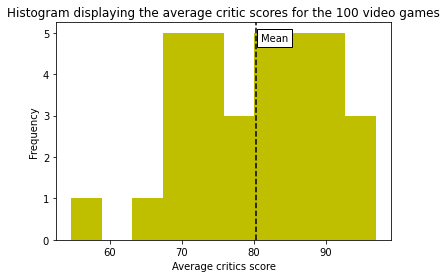

In [22]:
plt.hist(game_scores, color = 'y')
plt.axvline(x=mean_ave_critic_score, color = 'black', ls = '--')
plt.title("Histogram displaying the average critic scores for the 100 video games")
plt.text(81,4.8,'Mean', bbox = {'facecolor':'white'})
plt.ylabel('Frequency')
plt.xlabel('Average critics score')

plt.show()

After reviewing the histogram, there doesn't appear to be a normal distribution, and there doesn't appear to be noticeable skewness to the distribution. The histogram resembles more of a uniform distribution. From this sample, there is a large range of scores from 70% to 90/95%, which emphasises a good variation of scores from a relatively small sample. Collecting a larger sample of video games could potentially give a clearer distribution.

### Mean of the average critic scores by genre

In [23]:
#group by genre
by_genre = df.groupby(['genre']).critics_score.mean()
by_genre.sort_values(ascending=False)

genre
Simulation, Racing                              92.538462
Puzzle, Platformer                              90.960000
Puzzle, Adventure, Platformer                   90.549550
Adventure, Third-Person Shooter                 90.198312
Adventure, Platformer                           89.986667
Sports                                          89.365672
Action, Platformer                              88.065217
RPG, Third-Person Shooter                       87.606383
Fighting, Action                                86.764706
Action, Strategy                                86.443548
Horror                                          86.351351
Fighting, Action, Arcade                        86.227273
Third-Person Shooter, Action, Adventure         85.840000
Fighting                                        85.714894
Action, Third-Person Shooter                    84.692308
Action                                          84.482759
Action, Adventure, RPG                          84.429358
Action, 

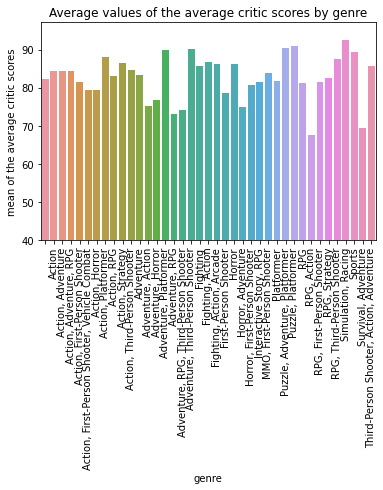

In [24]:
fig, ax = plt.subplots()
sns.barplot(x = by_genre.index, y = by_genre.values)
ax.set_xticklabels(labels = by_genre.index, rotation=90)
ax.set_ylim(bottom=40)
ax.set_ylabel('mean of the average critic scores')
ax.set_title('Average values of the average critic scores by genre')

plt.show()

Games that involve puzzles tend to score highly. RPG and adventure games are scrutinized more due to their frequent appearance in the lowest 7 means. Simulation and racing games are scored the highest. The high scores for simulation and racing games could lend to the need to emulate the real life, and succeeding, which is possibly a less challenging concept than creating an original idea and executing the gameplay correctly in the other categories.

Apart from these observations, there are no other observable patterns in this data grouped by genre. There is variability in this data, however, which is suitable to work with.

### Mean of the average critic scores by developer

In [25]:
developer = df.groupby(['developer']).critics_score.mean()
developer.sort_values(ascending=False)

developer
SIE Santa Monica Studio    95.251908
Playground Games           92.538462
Playdead                   90.549550
FromSoftware               90.025000
Guerrilla                  89.792000
                             ...    
DICE,                      68.187500
Machine Games,             68.104348
Cyanide                    68.053097
Experiment 101             67.604839
Bethesda Game Studios      54.685185
Name: critics_score, Length: 65, dtype: float64

It does appear that some developers outperform other when it comes to the average critic score. It is interesting to see that Bethesda Game Studios and DICE are in the bottom five as they are high profile developing studios. Could it be that their reputation is the reason for the lower scores? A critic's impartiality shouldn't be a cause for these low scores but there is a possibility that critics enter a review with a sense of expectation. It is a credible hypothesis but not possible to explore with a small sample of games. A possible sentiment analysis on reviews written for games provided by these developers could shed light on the reasoning behind these low review scores.

In [ ]:
df.to_csv('opencritic_data_cleaned.csv')

## Conclusion and project question

The explorative data analysis gives clear indication that video game data collected from opencritic has an element of variation that requires further interrogation and exploration. From a business perspective, a viable question to ask of the data is: can game developers use the language of critic reviews to conclusively evaluate the quality of their gaming products? This will be question that the project will be designed around.

To achieve a conclusion to this question, the data will need to be processed in a way that is suitable for analysis. This processing will require the removal of punctuation, lemmatising the text and removing any stopwords that could interfere with the analysis. 

Short, uninformative words will be removed to avoid false signals being mistaken for a prediction in the classifier. The 'stop_words' argument will be incorporated into the term-frequency and inverse-document-frequency. A Naive Bayes classification model and Decision Trees regression model will be used to train the data to make predictions of future review summaries of their scores. An analysis of the accuracy will determine the viability of the model. The Naive Bayes classifier is based on the Bayes theorem, where the outcome or probability of an event is determined based in prior knowledge of conditions that are possibly related in some way to the event. It is assumed that all of the input features are independent, which will be the case for this project.

As stated in the literature review, a potential limitation of classifying reviews is the use of the English language in an unorthodox nature. For example, referring to a video game positively using a word that is generally regarded in the English dictionary as a negative term. Another limitation is the inability to produce results of the classification prior to the release of a video game. However, many games are able to make updates to their games after release so a continuous maintenance and evolution of a game using reviews is a possibility.

## References (Vanvoucer format)

1. Rotten Tomatoes. 45 Video Game Movies Ranked Worst to Best. Available from: https://editorial.rottentomatoes.com/guide/video-game-movies-ranked-worst-to-best/
2. Tripp S, Grueber M, Simkins J, Yetter D. Videos Games in the 21st Century: The 2020 Economic Impact Report. TEConomy Partners, LLC. The Entertainment Software Association. 2020. pp 15.
3. Wikipedia. Lisits of review aggregators and review sites. Available from: https://develop.consumerium.org/wiki/Lists_of_review_aggregators_and_review_sites#Games_review_aggregators
4. Metacritic. How do you compute Metascores? Available from: https://cbsi.secure.force.com/CBSi/articles/en_US/Knowledge/How-do-you-compute-Metascores?retURL=%2FCBSi%2Fapex%2Fknowledgehome&popup=false&categories=CBS_Interactive%3AMetacritic&template=template_metacritic&referer=metacritic.com&data=&cfs=default
5. Chevalier JA, Mayzlin D. The effect of word of mouth on sales: Online book reviews. J Market Res. 2006;43(3):345-354.
6. Duan W, Gu B, Whinston AB. The dynamics of online word-of-mouth and product sales—An empirical investigation of the movie industry. J Retail. 2008;84(2):233-242.
7. Santos T, Lemmerich F, Strohmaier M, Helic D. What's in a review: Discrepancies between expert and amateur reviews of video games on metacritic. Proceedings of the ACM on human-computer interaction. 2019;3(CSCW):1-22.
8. Zagal JP, Tomuro N, Shepitsen A. Natural language processing in game studies research: An overview. Simulation & gaming. 2012;43(3):356-373.
9. Drake A, Ringger E, Ventura D. Sentiment Regression: Using Real-Valued Scores to Summarize Overall Document Sentiment. IEEE. 2008: 152–157. 
10. Zuo Z. Sentiment Analysis of Steam Review Datasets using Naive Bayes and Decision Tree Classifier. Illinois Digital Environment for Access to Learning and Scholarship. 2018.
11. Red ventures. Terms of Use. Available from: https://www.redventures.com/legal/cmg-terms-of-use.html
12. OpenCritic. Terms of Use. Available from: https://opencritic.com/terms

